In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\silvi\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [27]:
# Reading AAPL Closing Prices
aapl_history_csv = Path("AAPL.csv")
aapl_history = pd.read_csv(
    aapl_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
aapl_history = aapl_history.sort_index()
aapl_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,67.077499,68.425003,66.457497,68.312500,67.787041,131022800
2020-04-14,70.000000,72.062500,69.512497,71.762497,71.210495,194994800
2020-04-15,70.599998,71.582497,70.157501,71.107498,70.560539,131154400
2020-04-16,71.845001,72.050003,70.587502,71.672501,71.121201,157125200
2020-04-17,71.172501,71.737503,69.214996,70.699997,70.156174,215250000


In [28]:
# Check Data Types
aapl_history.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [29]:
# Calculate Daily Returns
aapl_returns = aapl_history.pct_change()
aapl_returns.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,0.043569,0.053160,0.045969,0.050503,0.050503,0.488251
2020-04-15,0.008571,-0.006661,0.009279,-0.009127,-0.009127,-0.327395
2020-04-16,0.017635,0.006531,0.006129,0.007946,0.007946,0.198017
2020-04-17,-0.009360,-0.004337,-0.019444,-0.013569,-0.013569,0.369927


In [30]:
# Drop column from AAPl history
aapl_returns = aapl_returns.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
aapl_returns

,Adj Close
Date,
2020-04-13,NaN
2020-04-14,0.050503
2020-04-15,-0.009127
2020-04-16,0.007946
2020-04-17,-0.013569
2020-04-20,-0.020757
2020-04-21,-0.030910
2020-04-22,0.028804
2020-04-23,-0.003875


In [31]:
# Drop nulls
aapl_returns = aapl_returns.dropna().copy()
aapl_returns.head()

,Adj Close
Date,
2020-04-14,0.050503
2020-04-15,-0.009127
2020-04-16,0.007946
2020-04-17,-0.013569
2020-04-20,-0.020757


In [32]:
# Rename `Adj Close` Column to be specific to this stock.
aapl_returns = aapl_returns.rename(columns={"Adj Close": "AAPL"})
aapl_returns.head()

,AAPL
Date,
2020-04-14,0.050503
2020-04-15,-0.009127
2020-04-16,0.007946
2020-04-17,-0.013569
2020-04-20,-0.020757


In [33]:
# Reading TSLA Closing Prices
tsla_history_csv = Path("TSLA.csv")
tsla_history = pd.read_csv(
    tsla_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
tsla_history = tsla_history.sort_index()
tsla_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,118.031998,130.399994,116.106003,130.190002,130.190002,112377000
2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500
2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000
2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500
2020-04-17,154.455994,154.990005,149.531998,150.778000,150.778000,65641000


In [34]:
# Calculate Daily Returns
tsla_returns = aapl_history.pct_change()
tsla_returns.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,0.043569,0.053160,0.045969,0.050503,0.050503,0.488251
2020-04-15,0.008571,-0.006661,0.009279,-0.009127,-0.009127,-0.327395
2020-04-16,0.017635,0.006531,0.006129,0.007946,0.007946,0.198017
2020-04-17,-0.009360,-0.004337,-0.019444,-0.013569,-0.013569,0.369927


In [35]:
# Drop column from TSLA history
tsla_returns = tsla_returns.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
tsla_returns

,Adj Close
Date,
2020-04-13,NaN
2020-04-14,0.050503
2020-04-15,-0.009127
2020-04-16,0.007946
2020-04-17,-0.013569
2020-04-20,-0.020757
2020-04-21,-0.030910
2020-04-22,0.028804
2020-04-23,-0.003875


In [36]:
# Drop nulls
tsla_returns = tsla_returns.dropna().copy()
tsla_returns.head()

,Adj Close
Date,
2020-04-14,0.050503
2020-04-15,-0.009127
2020-04-16,0.007946
2020-04-17,-0.013569
2020-04-20,-0.020757


In [37]:
# Rename `Adj Close` Column to be specific to this stock.
tsla_returns = tsla_returns.rename(columns={"Adj Close": "TSLA"})
tsla_returns.head()

,TSLA
Date,
2020-04-14,0.050503
2020-04-15,-0.009127
2020-04-16,0.007946
2020-04-17,-0.013569
2020-04-20,-0.020757


In [38]:
# Reading BTC Closing Prices
btc_history_csv = Path("BTC-USD.csv")
btc_history = pd.read_csv(
    btc_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
btc_history = btc_history.sort_index()
btc_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-11,6867.440430,6926.069824,6789.920898,6859.083008,6859.083008,3.122209e+10
2020-04-12,6858.067871,7119.947266,6811.078125,6971.091797,6971.091797,3.575957e+10
2020-04-13,6965.616699,6965.616699,6668.259766,6845.037598,6845.037598,3.861931e+10
2020-04-14,6843.281738,6958.557129,6793.821289,6842.427734,6842.427734,3.411043e+10
2020-04-15,6845.561523,6928.664551,6633.402832,6642.109863,6642.109863,3.228831e+10


In [39]:
# Calculate Daily Returns
btc_returns = btc_history.pct_change()
btc_returns.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-11,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-12,-0.001365,0.027992,0.003116,0.016330,0.016330,0.145329
2020-04-13,0.015682,-0.021676,-0.020969,-0.018082,-0.018082,0.079971
2020-04-14,-0.017563,-0.001013,0.018830,-0.000381,-0.000381,-0.116752
2020-04-15,0.000333,-0.004296,-0.023612,-0.029276,-0.029276,-0.053418


In [40]:
# Drop nulls
btc_returns = btc_returns.dropna().copy()
btc_returns.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-12,-0.001365,0.027992,0.003116,0.016330,0.016330,0.145329
2020-04-13,0.015682,-0.021676,-0.020969,-0.018082,-0.018082,0.079971
2020-04-14,-0.017563,-0.001013,0.018830,-0.000381,-0.000381,-0.116752
2020-04-15,0.000333,-0.004296,-0.023612,-0.029276,-0.029276,-0.053418
2020-04-16,-0.029962,0.029701,-0.011743,0.071467,0.071467,0.448922


In [41]:
# Drop column from BTC history
btc_returns = btc_returns.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
btc_returns

,Adj Close
Date,
2020-04-12,0.016330
2020-04-13,-0.018082
2020-04-14,-0.000381
2020-04-15,-0.029276
2020-04-16,0.071467
2020-04-17,0.000000
2020-04-18,0.019793
2020-04-19,-0.009403
2020-04-20,-0.042766


In [42]:
# Rename `Adj Close` Column to be specific to this stock.
btc_returns = btc_returns.rename(columns={"Adj Close": "BTC"})
btc_returns.head()

,BTC
Date,
2020-04-12,0.016330
2020-04-13,-0.018082
2020-04-14,-0.000381
2020-04-15,-0.029276
2020-04-16,0.071467


In [17]:
# Reading TNX Closing Prices
tnx_history_csv = Path("^TNX.csv")
tnx_history = pd.read_csv(
    tnx_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
tnx_history = tnx_history.sort_index()
tnx_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,0.741,0.759,0.722,0.749,0.749,0.0
2020-04-14,0.747,0.757,0.730,0.752,0.752,0.0
2020-04-15,0.687,0.688,0.627,0.638,0.638,0.0
2020-04-16,0.614,0.624,0.594,0.609,0.609,0.0
2020-04-17,0.643,0.658,0.587,0.654,0.654,0.0


In [45]:
# Calculate Daily Returns
tnx_returns = tnx_history.pct_change()
tnx_returns.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,0.008097,-0.002635,0.011080,0.004005,0.004005,NaN
2020-04-15,-0.080321,-0.091149,-0.141096,-0.151596,-0.151596,NaN
2020-04-16,-0.106259,-0.093023,-0.052632,-0.045455,-0.045455,NaN
2020-04-17,0.047231,0.054487,-0.011785,0.073892,0.073892,NaN


In [46]:
# Drop column from TNX history
tnx_returns = tnx_returns.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
tnx_returns

,Adj Close
Date,
2020-04-13,NaN
2020-04-14,0.004005
2020-04-15,-0.151596
2020-04-16,-0.045455
2020-04-17,0.073892
2020-04-19,0.000000
2020-04-20,-0.042813
2020-04-21,-0.087859
2020-04-22,0.084063


In [47]:
# Rename `Adj Close` Column to be specific to this stock.
tnx_returns = tnx_returns.rename(columns={"Adj Close": "TNX"})
tnx_returns.head()

,TNX
Date,
2020-04-13,NaN
2020-04-14,0.004005
2020-04-15,-0.151596
2020-04-16,-0.045455
2020-04-17,0.073892


In [48]:
# Drop nulls
tnx_returns = tnx_returns.dropna().copy()
tnx_returns.head()

,TNX
Date,
2020-04-14,0.004005
2020-04-15,-0.151596
2020-04-16,-0.045455
2020-04-17,0.073892
2020-04-19,0.000000


# Combine AAPL, TSLA, BTC and TNX Returns

In [49]:
# Join AAPL Returns, TSLA Returns, BTC Returns and the TNX Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([aapl_returns, tsla_returns, btc_returns, tnx_returns], axis="columns", join="inner")
all_portfolios.head()

,AAPL,TSLA,BTC,TNX
Date,,,,
2020-04-14,0.050503,0.050503,-0.000381,0.004005
2020-04-15,-0.009127,-0.009127,-0.029276,-0.151596
2020-04-16,0.007946,0.007946,0.071467,-0.045455
2020-04-17,-0.013569,-0.013569,0.000000,0.073892
2020-04-20,-0.020757,-0.020757,-0.042766,-0.042813


# Performance Anlysis
# Calculate and Plot the daily returns

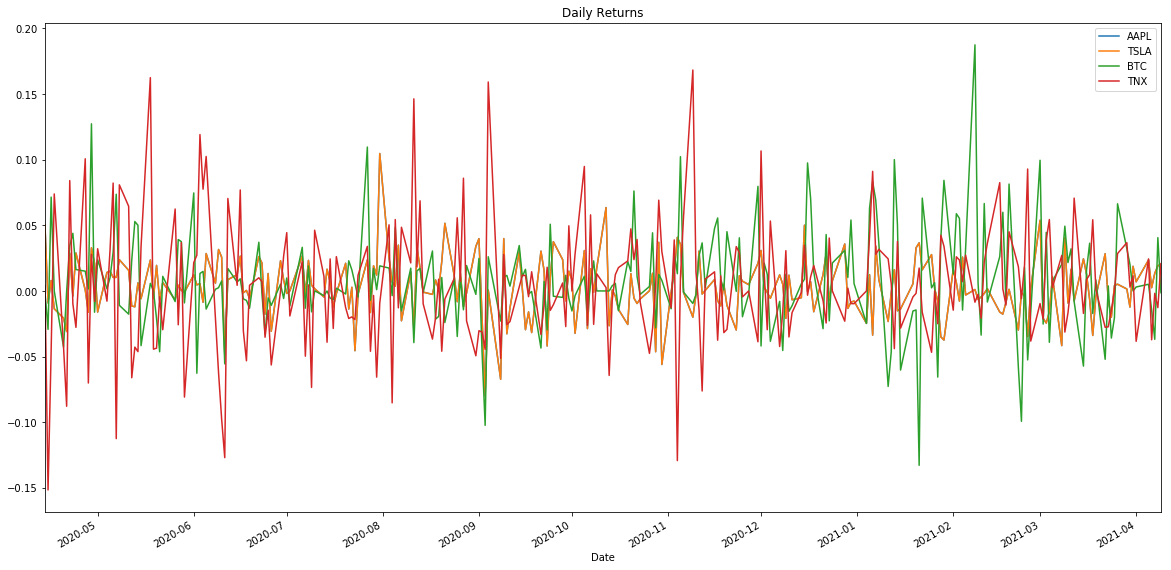

In [50]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20, 10), title="Daily Returns")

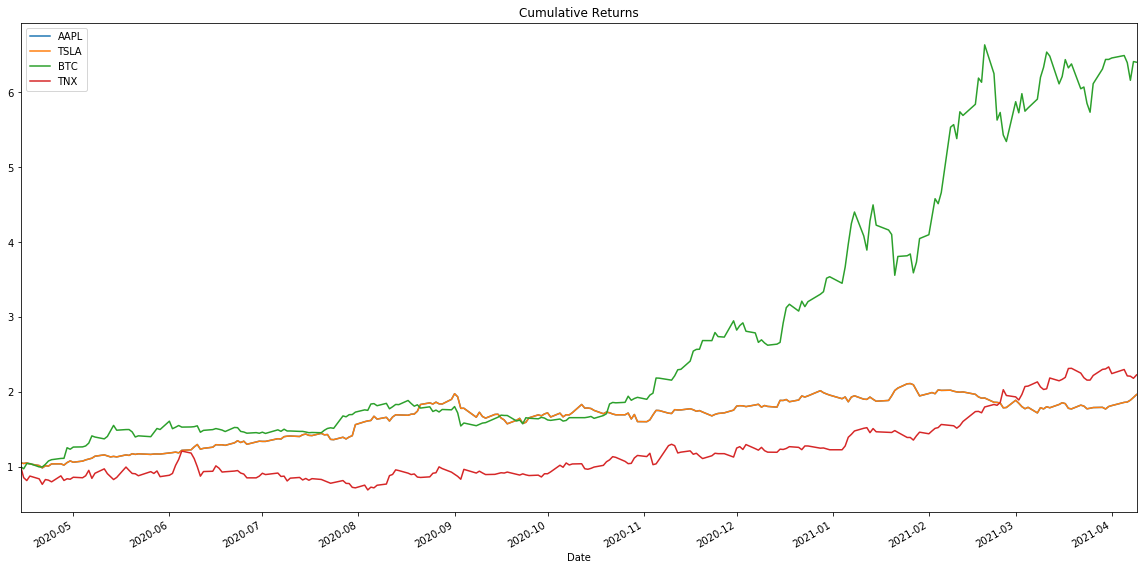

In [51]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

# Risk Analysis

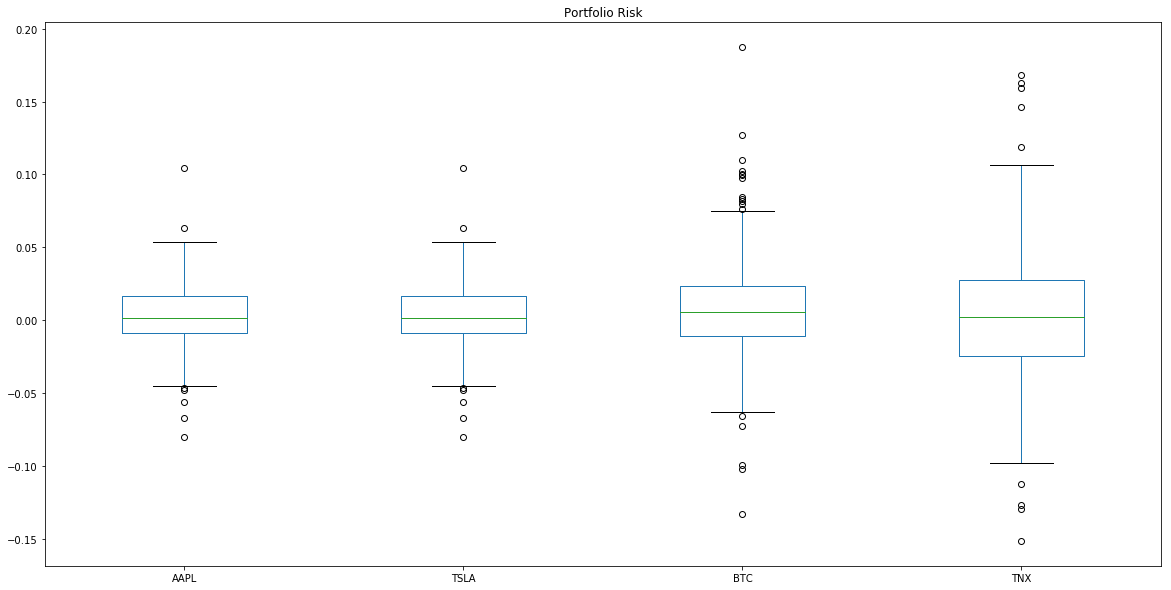

In [52]:
# Box plot to visually show risk
all_portfolios.plot.box(figsize=(20, 10), title="Portfolio Risk")

In [53]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

AAPL    0.022548
TSLA    0.022548
BTC     0.037857
TNX     0.046734
dtype: float64

In [54]:
# Calculate the annualized standard deviation (252 trading days)
anual_std = all_portfolios.std() * np.sqrt(252)
anual_std

AAPL    0.357945
TSLA    0.357945
BTC     0.600959
TNX     0.741883
dtype: float64

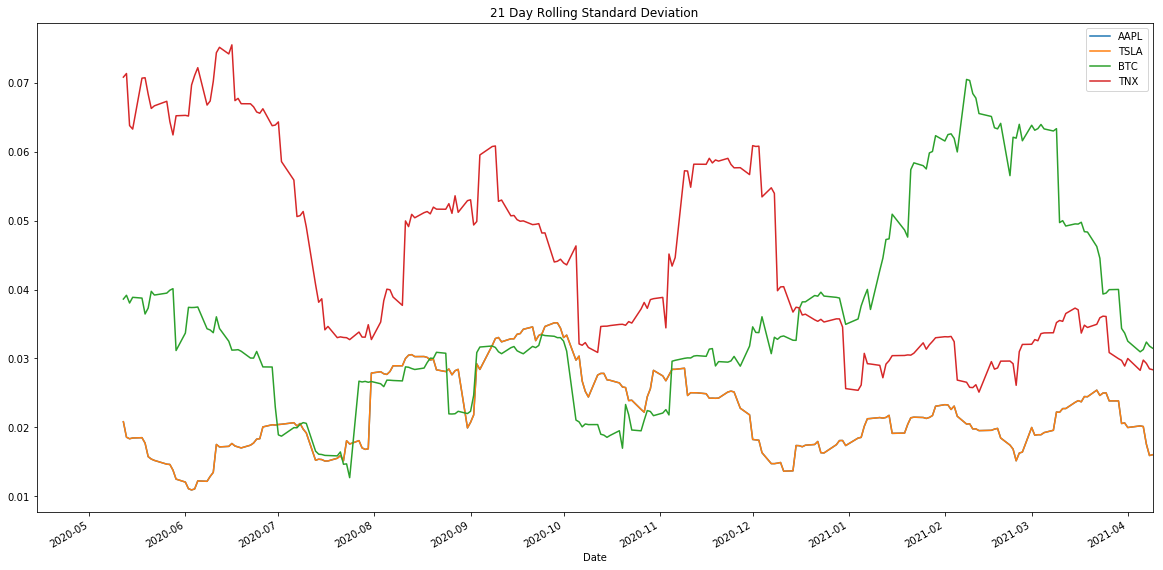

In [55]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

In [56]:
# Calculate the correlation
corr_df = all_portfolios.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

,AAPL,TSLA,BTC,TNX
AAPL,1,1,0.195238,0.00300871
TSLA,1,1,0.195238,0.00300871
BTC,0.195238,0.195238,1,0.052484
TNX,0.00300871,0.00300871,0.052484,1
